<h1> Проверка гипотез по увеличению выручки в интернет-магазине - оценить результаты AB теста. </h1>

#### Описание проекта

Вы - аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.


Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

#### Описание данных

Данные для первой части. Файл /datasets/hypothesis.csv.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части. Файл /datasets/orders.csv.
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.


Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
# импортируем библиотеки, нужные для работы

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import os

In [2]:
# определим функцию поиска файла в папках Linux и Windows (если тетрадка работает локально)

def file_path(name):
    # считываем дата-файл с попыткой взять данные локально: 4 попытки для Я-сервера и Windows
    # файл должен располагаться рядом с тетрадкой или во вложенном каталоге "datasets" 

    for p in ('/datasets', '', os.path.abspath(""), os.path.abspath("")+'\\datasets\\'):
        pth1 = os.path.join(p, name)
        if os.path.exists(pth1):
            break # если поиск окончился успехом - рвём цикл досрочно
    else:
        pth1 = ''
        print(f'Файл {name} не был найден. Проверьте имя и убедитесь, что он', 
              'присутствует в каталоге рядом с тетрадкой или во вложенной папке "/datasets"')
    print('Чтение данных из:', pth1, '\n')
    return pth1

In [3]:
# считываем 3 дата-файла 
name = 'hypothesis.csv'                    # гипотезы    
hypothesis = pd.read_csv(file_path(name))  # записываем файл с данными в датафрейм  

name = 'orders.csv'                        # покупки    
orders = pd.read_csv(file_path(name))      # записываем файл с данными в датафрейм  

name = 'visitors.csv'                      # посещения    
visitors = pd.read_csv(file_path(name))    # записываем файл с данными в датафрейм  

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) #строки в даты
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) #строки в даты  

Чтение данных из: hypothesis.csv 

Чтение данных из: orders.csv 

Чтение данных из: visitors.csv 



In [4]:
# проверим наличие пропусков: нули означают, что пропусков нет

hypothesis.isna().sum(), orders.isna().sum(), visitors.isna().sum()

(Hypothesis    0
 Reach         0
 Impact        0
 Confidence    0
 Efforts       0
 dtype: int64,
 transactionId    0
 visitorId        0
 date             0
 revenue          0
 group            0
 dtype: int64,
 date        0
 group       0
 visitors    0
 dtype: int64)

In [5]:
# если случайно закрались дубликаты - очистим

orders.drop_duplicates(inplace=True)
visitors.drop_duplicates(inplace=True)

In [6]:
# для ICE 3 колонки маркеров подставим в формулу, отсортируем по убыванию приоритетов
pd.options.display.max_colwidth = 150 # увеличим ширину полей (для гипотез)

hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] /
                     hypothesis['Efforts'], 2)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [7]:
# подставим в формулу 4 колонки маркеров RICE и отсортируем по убыванию приоритетов

hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * 
                      hypothesis['Confidence'] / hypothesis['Efforts'])
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [8]:
# сравним ранги гипотез по 2-м методам приоритизации, распечатав их индексы

ice = hypothesis.sort_values(by='ICE', ascending=False).index
rice = hypothesis.sort_values(by='RICE', ascending=False).index
print('Приоритеты гипотез по  ICE', *ice)
print('Приоритеты гипотез по RICE', *rice)

Приоритеты гипотез по  ICE 8 0 7 6 2 1 5 3 4
Приоритеты гипотез по RICE 7 2 0 6 8 3 1 5 4


__Выводы по приоритизации гипотез, n.1.1:__ 
- RICE приортизация дала почти полностью иной результат по сравнению с методом ICE. Дело в том, что колонка Reach имеет большой разбег (от 1 до 10) для разных гипотез, поэтому после домножения на неё 8 мест переставились, и лишь на 4-м месте осталась гипотеза №6 и на последнем гипотеза №4. Гипотезы №0 и №6 по RICE в приоритете практически равны (делят места 3 и 4).

### Часть 2. Анализ A/B-теста

Исследуем данные датасета с заказами.

In [9]:
# для удобства 2 колонки в данных заказов приведём к тем, что даны в коде онлайн-уроков

orders.rename(columns={'transactionId': 'orderId', 'visitorId': 'userId'}, inplace=True)

In [10]:
orders.head() # выведем для наглядности первые 5 строк из датафрейма orders

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.date.min(), orders.date.max() # отобразим временны́е границы эксперимента

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

In [12]:
orders.group.unique() # группы, участвующие в эксперименте

array(['B', 'A'], dtype=object)

In [13]:
set_A = set(orders[orders['group'] == 'A']['userId']) # количество уник. пользователей в группе А
set_B = set(orders[orders['group'] == 'B']['userId']) # количество уник. пользователей в группе В
cross_AB = set_A & set_B    # пользователи, одновременно попавшие в обе группы (фликеры, кажется?..)     
len(set_A), len(set_B), len(cross_AB)  # размеры групп и их пересечение  

(503, 586, 58)

In [14]:
orders_A = orders[orders['group'] == 'A']
orders_A[orders_A['userId'].isin(cross_AB)]['revenue'].sum() # выручка от раздвоившихся пользователей в гр.А

720147

In [15]:
orders_B = orders[orders['group'] == 'B']
orders_B[orders_B['userId'].isin(cross_AB)]['revenue'].sum() # выручка от раздвоившихся пользователей в гр.В

838788

__Замечания по экспериментальным данным.__


- Какая из списка гипотез была запущена, явным образом в условиях задания не сказано. 
- Временны́е границы эксперимента с 2019-08-01 по 2019-08-31.
- В эксперименте участвуют 2 группы: А и В.
- В группе А 503 пользователя, в В - 586, при этом 58ми пользователям "повезло" попасть в обе группы.
- Выручка от этих раздвоившихся пользователей примерно одинаковая в обеих группах: в А - 720147, в В - 838788.
- Какой эксперимент проводился и как "чисто" себя вели 58 раздвоившихся пользователей в разных группах, неизвестно. Наиболее разумно в данных обстоятельствах отбросить из списка заказов все записи с участием этих 58 "раздвоившихся" пользователей.
- Наличие ошибок в базе с заказами означает, что база с визитами тоже скомпрометирована. Ошибки величиной до ±10% (58/586) в счётчиках визитов вероятны. Однако без знания природы ошибки (и её фактического наличия) откорректировать правильным образом базу с визитами после удаления заказов "раздвоившихся" пользователей не удастся. Для продолжения работы над проектом будем считать, что мы переговорили с дата-инженерами и согласились, что эти 58 пользователей заходили в систему, но "ничего не покупали", а счётчики групп в базе визитов "работали правильно". 
- Число пользователей по группам изначально не 50-на-50 (так сработал алгоритм от дата-инженеров). Далее нужно будет ввести поправочный коэффициент. (Альтернативное решение, которое тут не будем применять - это удалить из группы В 528-445=83 лишних пользователя случайным образом).
- Ниже будет продемонстрирована большая доля выручки у "аномальных" пользователей от общей выручки. Такая аномалия тоже может служить признаком ошибок в сборе данных.

In [16]:
orders = orders[~orders['userId'].isin(cross_AB)] # оставляем только "правильных" пользователей

In [17]:
# заказы в группе А и уникальные пользователи после удаления "неправильных" покупок

orders[orders['group'] == 'A']['userId'].count(), orders[orders['group'] == 'A']['userId'].nunique()

(468, 445)

In [18]:
# заказы в группе В и уникальные пользователи после удаления "неправильных" покупок

orders[orders['group'] == 'B']['userId'].count(), orders[orders['group'] == 'B']['userId'].nunique()

(548, 528)

In [19]:
# выборка В больше выборки А по количеству пользователей в corr раз 

corr = orders[orders['group'] == 'B']['userId'].nunique() / orders[orders['group'] == 'A']['userId'].nunique()
corr

1.1865168539325843

Этот коэффициент будем использовать ниже в качестве поправки на разное количество участников групп А и В.

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [20]:
# раздельно для групп A и B сформируем выручку по дням и далее агрегируем по сумме 

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(    # кумулятивная выручка по группе А
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(    # кумулятивная выручка по группе В
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [21]:
ordersACummulative.tail(3) # для группы А оценим порядок чисел в конце таблицы

,date,ordersCummulativeA,revenueCummulativeA
28,2019-08-29,451,3233233
29,2019-08-30,460,3311413
30,2019-08-31,468,3364656


Ниже мы впервые сделаем поправку на неравенство групп А и В с помощью рассчитанного выше коэффициента corr, далее аналогичные коррекции выполним по необходимости. 

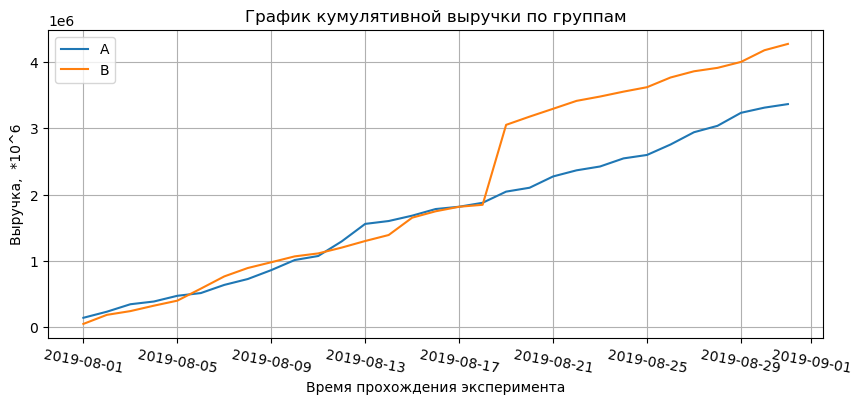

In [22]:
plt.figure(figsize=(10, 4)) # зададим размер полотна

# строим график выручки группы А
plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA'], label='A')

# строим график выручки группы B
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB']/corr, label='B') # скорректировано corr

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка,  *10^6')
plt.legend() # подписи линий на графике (легенда)
plt.xlabel("Время прохождения эксперимента") # подпись выглядит наклонённой
plt.xticks(rotation=-10) # для избежания оптических иллюзий от наклона подписей в следующих графиках откажемся
plt.grid() # сетка
plt.show()

__Выводы из графика кумулятивной выручки по группам, n.2.1:__ 
- Группы В и А очень схожи, с 18 на 19 агуста появляется дополнительный разрыв, причину которого предстоит изучить. Это может быть одна или несколько "аномальных" покупок, нужно разбираться (см. п. 2.11).

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Здесь поправка на размер группы не требуется, поскольку для группы В надо было бы корректировать и числитель, и знаменатель.

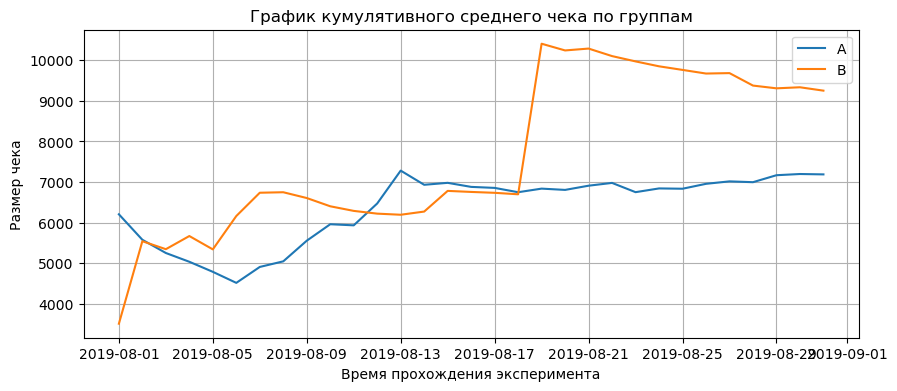

In [23]:
plt.figure(figsize=(10, 4)) # зададим размер полотна
plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA'] /
         ordersACummulative['ordersCummulativeA'], label='A')
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB'] /
         ordersBCummulative['ordersCummulativeB'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Размер чека')
plt.legend() # подписи линий на графике (легенда)
plt.xlabel("Время прохождения эксперимента")
plt.grid() # сетка
plt.show()

__Выводы из графика среднего чека по группам, n.2.2:__ 
- Вначале группа В опережает группу А, затем лидерство непонятно, но с 18 на 19 агуста появляется дополнительный разрыв (его причину предстоит изучить), и он вновь выводит в лидеры группу В. Однако далее средний чек В падает, а средний чек А слегка растёт.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Поправка corr для относительных величин, которые рассчитываются как отношение величины к количеству участников группы, - требоваться не будет.

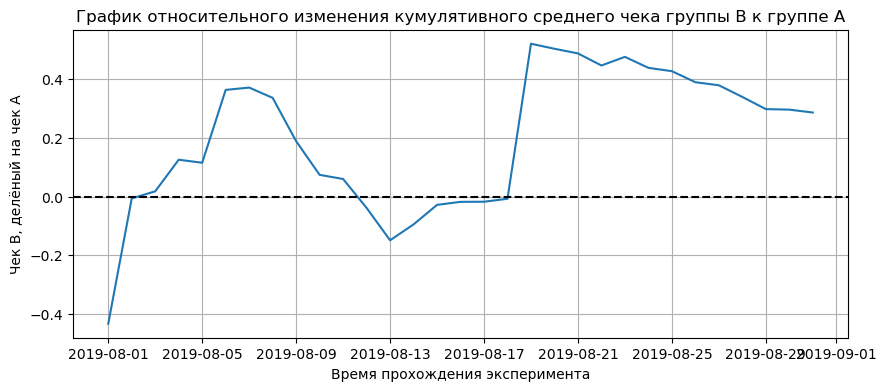

In [24]:
plt.figure(figsize=(10, 4)) # размер полотна
plt.plot(ordersBCummulative['date'], 
         (ordersBCummulative['revenueCummulativeB']/ordersBCummulative['ordersCummulativeB']) /
         (ordersACummulative['revenueCummulativeA']/ordersACummulative['ordersCummulativeA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Чек B, делёный на чек A')
plt.xlabel("Время прохождения эксперимента")
plt.grid() # сетка
plt.show()

__Выводы из графика соотношения чеков B и A, n.2.3:__ 
- В целом группа В выглядит предпочтительнее, она ненадолго уступала группе А только в начале и в середине эксперимента. Но без разбора аномалии 18-19 августа делать окончательные выводы рано.

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

In [25]:
# на всякий случай проверим, что границы интервалов дат посещений и заказов совпадают

print(visitors.date.min(), visitors.date.max())
print(orders.date.min(), orders.date.max())

2019-08-01 00:00:00 2019-08-31 00:00:00
2019-08-01 00:00:00 2019-08-31 00:00:00


In [26]:
# по аналогии с заказами посчитаем кумулятивные посещения по группам

visitorsA = visitors[visitors['group']=='A'][['date','visitors']] # визиты по группе А

visitorsAcumulative = visitorsA.apply(    # кумулятивные визиты по группе А
    lambda x: visitorsA[visitorsA['date'] <= x['date']].agg(
        {'date': 'max', 'visitors': 'sum'}
    ), axis=1,
    ).sort_values(by=['date'])
visitorsAcumulative.columns = ['date','visitsAcumulative']


visitorsB = visitors[visitors['group']=='B'][['date','visitors']] # визиты по группе B

visitorsBcumulative = visitorsB.apply(    # кумулятивные визиты по группе B
    lambda x: visitorsB[visitorsB['date'] <= x['date']].agg(
        {'date': 'max', 'visitors': 'sum'}
    ), axis=1,
    ).sort_values(by=['date'])
visitorsBcumulative.columns = ['date','visitsBcumulative']

visitorsBcumulative.head(2) # проверим результат, кумулятивные визиты по группе B:

,date,visitsBcumulative
31,2019-08-01,713
32,2019-08-02,1294


In [27]:
# переназовём колонки у двух датафреймов для будущего использования

visitorsA.columns=['date','visitorsA']
visitorsB.columns=['date','visitorsB']

In [28]:
ordersAvisistsCum = ordersACummulative.merge(visitorsAcumulative, # соединяем заказы и визиты по группе A
                    left_on='date', right_on='date', how='left')

ordersBvisistsCum = ordersBCummulative.merge(visitorsBcumulative, # соединяем заказы и визиты по группе B
                    left_on='date', right_on='date', how='left')

ordersBvisistsCum.head(2)

,date,ordersCummulativeB,revenueCummulativeB,visitsBcumulative
0,2019-08-01,17,59758,713
1,2019-08-02,40,221801,1294


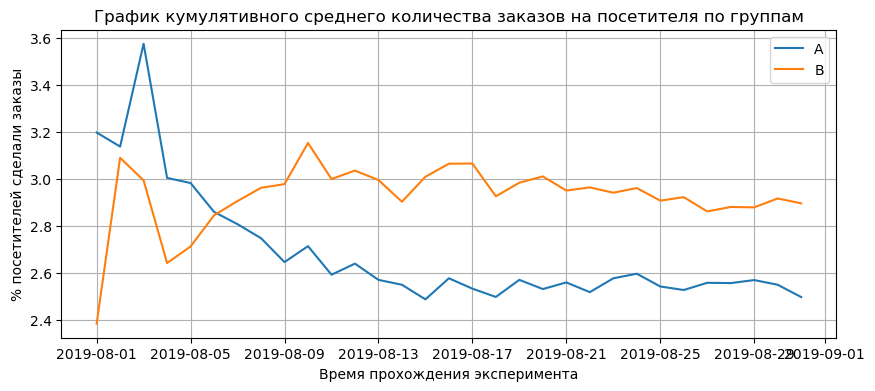

In [29]:
plt.figure(figsize=(10, 4)) # зададим размер полотна
plt.plot(ordersAvisistsCum['date'], 100 * ordersAvisistsCum['ordersCummulativeA']/
         ordersAvisistsCum['visitsAcumulative'], label='A')
plt.plot(ordersBvisistsCum['date'], 100 * ordersBvisistsCum['ordersCummulativeB']/
         ordersBvisistsCum['visitsBcumulative'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('% посетителей сделали заказы')
plt.legend() # подписи линий на графике (легенда)
plt.xlabel("Время прохождения эксперимента")
plt.grid() # сетка
plt.show()

__Выводы из графика кумулятивного среднего количества заказов на посетителя, n.2.4:__ 
- К концу 1-й недели линии групп относительно стабилизировались и преимущество группы В выглядит уверенным (~2.9% для группы В против ~2.5% у группы А).

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

Точность этого графика вызывает сомнения, так как данные по визитам, которые идут в знаменатель, могут быть с ошибкой до 10%.

Делать поправку corr на разную величину групп не будем, предполагая, что и визиты в каждой группе больше или меньше в той же пропорции, что и количество пользователей.

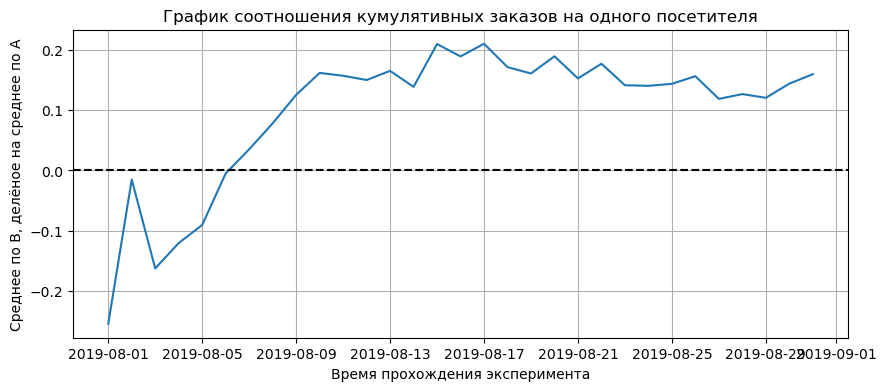

In [30]:
plt.figure(figsize=(10, 4)) # размер полотна
plt.plot(ordersBvisistsCum['date'], 
         (ordersBvisistsCum['ordersCummulativeB']/ordersBvisistsCum['visitsBcumulative']) /
         (ordersAvisistsCum['ordersCummulativeA']/ordersAvisistsCum['visitsAcumulative'])  - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График соотношения кумулятивных заказов на одного посетителя')
plt.ylabel('Среднее по В, делёное на среднее по A')
plt.xlabel("Время прохождения эксперимента")
plt.grid() # сетка
plt.show()

__Выводы из графика соотношения кумулятивных заказов на посетителя, n.2.5:__ 
- К концу 1-й недели группа В вышла в лидеры и её преимущество стабилизировалось на уровне ~12%.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [31]:
# сгруппируем заказы по всей базе (А+В), для каждого userId просуммируем заказы

ordersByUsers = (orders.groupby('userId', as_index=False)
                       .agg({'orderId': 'nunique'}))
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10) # лидеры по количеству заказов

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


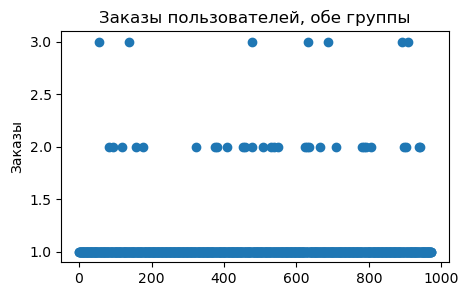

In [32]:
# для графика сформируем ось X - номера пользователей по порядку как в датафрейме

plt.figure(figsize=(5, 3)) # размер полотна
x_values = range(0, len(ordersByUsers['userId']))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Заказы пользователей, обе группы')
plt.ylabel('Заказы');

__Выводы из точечного графика заказов пользователей по обеим группам, n.2.6:__ 
- Чило заказов на пользователя - в основном 1, но есть и 2 и больше, максимально - 11 (пользователей с 6ю, 7ю, 9ю покупками в базе нет, то есть после 5 покупок точно идут аномалии).

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [33]:
print(' 90% 95% 99% \n', *np.percentile(ordersByUsers['orders'], [90, 95, 99]))

 90% 95% 99% 
 1.0 1.0 2.0


In [34]:
orders_threshold = np.percentile(ordersByUsers['orders'], 99) # для использования ниже при отсеивании выбросов
orders_threshold

2.0

__Выводы по n.2.7:__ 
- Аномальными пользователями будем считать тех, у кого более 2-х заказов (3 и более), это примерно 1% от общего числа.

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [35]:
# убедимся, что в базе все заказы уникальны: каждой строке соответствует свой номер заказа

orders.shape[0], orders['orderId'].nunique()

(1016, 1016)

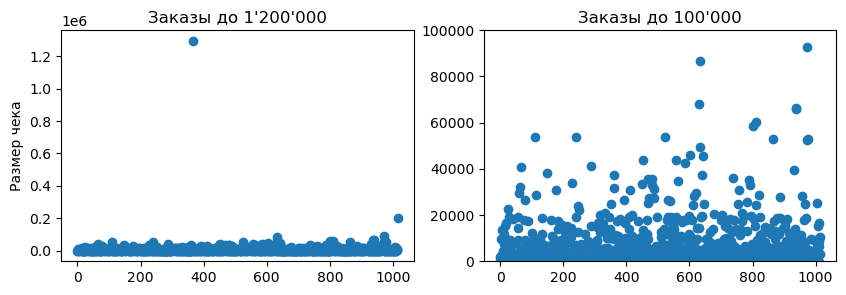

In [36]:
fig = plt.figure(figsize=(10, 3)) # размер полотна для двух графиков
fig.tight_layout()
ax1 = fig.add_subplot(1,2,1) # сюда войдут все чеки
ax2 = fig.add_subplot(1,2,2) # этот график будет для подробностей

# для графика сформируем ось X - номера заказов по порядку (как в датафрейме)
x_val = range(0, len(orders['userId']))
ax1.scatter(x_val, orders['revenue'])
ax1.set_title("Заказы до 1'200'000")
ax1.set_ylabel('Размер чека')

ax2.scatter(x_val, orders['revenue'])
ax2.set_ylim(0, 100000) # отсекаем данные более 100000
ax2.set_title("Заказы до 100'000");

__Выводы по n.2.8:__ 
- По-настоящему аномальных заказов, видимо, всего 2. Заказы до 100000 распределены более равномерно (см. правый график).

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [37]:
print(' 95%     97%     99% \n', *np.around(np.percentile(orders['revenue'], [95, 97, 99])))

 95%     97%     99% 
 26785.0 34792.0 53904.0


In [38]:
value_threshold = np.percentile(orders['revenue'], 97) # для использования ниже при отсеивании выбросов
value_threshold

34791.99999999998

__Выводы по n.2.9:__ 
- Аномальными будем считать заказы с чеком от 34792 (np.percentile(orders['revenue'], 97)), т.е. 3% от общего числа заказов.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Заказы сделали лишь несколько процентов пользователей. Чтобы составить массив для статистического изучения пользователей и их заказов, нужно к имеющимся заказам (т.е. где заказы на пользователя 1 и более) добавить массив из нулей, длина этого массива будет равна количеству пользователей, не сделавших ни одного заказа.

Создадим 2 массива (по одному на группу) и изучим их форму и распределение.

In [39]:
# создадим массивы с заказами >0 по группам 

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


# допишем к массиву заказов нули в количестве=посетители-покупатели 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsA['visitorsA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsB['visitorsB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

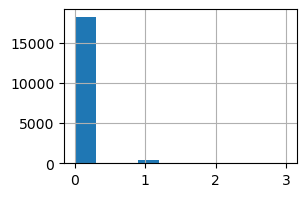

In [40]:
# распределение на гистограмме не нормальное и похоже на биномиальное

sampleA.hist(figsize=(3,2)); 

Попытка применить критерий Шапиро-Уилка на нормальность распределения полностью подтверждает факт того, что распределение не нормально (p-value = 0).

In [41]:
alpha = 0.01  # критический уровень статистической значимости

results = stats.shapiro(sampleA)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Наши две выборки независимые (ранее мы удалили всех пересекающихся пользователей) и распределены не по нормальному закону. Кроме того, в "сырых" выборках есть выбросы. Для сравнения таких выборок подходит непараметрический тест Уилкоксона-Манна-Уитни (единственное замечание - этот тест создан для малых выборок, у нас же количество элементов - несколько тысяч). Тест подтверждает либо опровергает нулевую гипотезу о статистическом равенстве двух выборок.

- Нулевая гипотеза. H0 : sampleA и sampleB одинаковы
- Альтернативная гипотеза. H1 : sampleA и sampleB разные

In [42]:
# выводим различие в количестве заказов у групп, а также p-value по тесту Уилкоксона-Манна-Уитни

print('Различие в среднем количестве заказов:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
print('По тесту Манна-Уитни p-value составил:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

Различие в среднем количестве заказов: 0.160
По тесту Манна-Уитни p-value составил: 0.011


__Выводы по n.2.10:__ 
- Относительное различие в среднем количестве заказов: 0.160, то есть по сырым данным заметен прирост заказов на каждого пользователя. Согласно методике теста Манна-Уитни рассчётный p-value составил 0.011, что меньше 5%, но всё же не ниже 1%. Иными словами, уверенность в неслучайности превосходства группы В над группой А есть, но "могла бы быть и лучше".

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Для сравнения выборок используем непараметрический тест Уилкоксона-Манна-Уитни. Тест подтверждает либо опровергает нулевую гипотезу о статистическом равенстве двух выборок.

- Нулевая гипотеза. H0 : выборки одинаковы
- Альтернативная гипотеза. H1 : выборки разные

In [43]:
# здесь также позаимствуем код из онлайн-урока "Анализ A/B-теста шаг за шагом", Задача 2.

print('Различие в среднем чеке:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1))
print('P-value по тесту Манна-Уитни:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

Различие в среднем чеке: 0.287
P-value по тесту Манна-Уитни: 0.829


__Выводы по n.2.11:__ 
- Группа В по среднему чеку опередила группу А на ~29%. Но ещё в п.2.1 был обнаружен скачок по выручке в группе В за 19 августа. И действительно, тест Манна-Уитни говорит, что выборки почти идентичны, p-value около 83%. Желательно отсеять выбросы и проверить результаты для очищенных данных.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [44]:
# по аналогии с Задачей 3 отфильтруем "аномальных" пользователей (orders_threshold порог  
# для количества заказов и value_threshold цена одного заказа - посчитаны ранее)

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_threshold]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_threshold]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > value_threshold]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# выведем первые 5 аномальных пользователей, их количество и число всех пользователей изначально

print(abnormalUsers.head(5), '\n\nАномальные покупатели:         ', abnormalUsers.shape[0], 
     '      Всего покупателей:       ', orders['userId'].nunique(),
     '\nВыручка аномальных покупателей:', 
     orders[np.logical_not(orders['userId'].isin(abnormalUsers))]['revenue'].sum(), # выручка от аномальных
     ' Выручка всех покупателей:', orders['revenue'].sum(),
     '\n\nДоля выручки аномальных среди всех покупателей:',
     round(100*orders[np.logical_not(orders['userId'].isin(abnormalUsers))]['revenue'].sum()/orders.revenue.sum()),'%'
     )

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
Name: userId, dtype: int64 

Аномальные покупатели:          38       Всего покупателей:        973 
Выручка аномальных покупателей: 5295869  Выручка всех покупателей: 8433628 

Доля выручки аномальных среди всех покупателей: 63 %


Количество аномальных покупателей ~4%, но выручка от них 63% общей выручки. Это говорит о какой-то ошибке. 

Нужно будет проконсультироваться с дата-инженерами на предмет возможной ошибки сбора данных и передать маркетологам ID отсеянных в данном тесте пользователей (сериес abnormalUsers). Для демонстрации контраста выведем 5 аномальных пользователей с их выручкой, а также медианную выручку по всей базе. Средний пользователь тратит 8300, а лидер аномальных покупателей - более миллиона(!).

In [45]:
round(orders['revenue'].mean())  # медианная выручка по всей базе

8301

In [46]:
(orders[orders['userId']   # выручка по 5 наиболее аномальным пользователям
 .isin(abnormalUsers)][['userId', 'revenue']]
 .groupby('userId')
 .sum()
 .sort_values(by='revenue', ascending=False)
 .head())

,revenue
userId,
1920142716,1294500
2108080724,202740
1307669133,92550
888512513,86620
759473111,72000


Вернёмся к заданию 2.12. Для сравнения выборок используем непараметрический тест Уилкоксона-Манна-Уитни. Тест подтверждает либо опровергает нулевую гипотезу о статистическом равенстве двух выборок.

- Нулевая гипотеза. H0 : очищенные выборки одинаковы
- Альтернативная гипотеза. H1 : очищенные выборки разные

In [47]:
# отсеяв аномальных покупателей с их огромной выручкой, по аналогии с Задачей 4 рассчитаем необходимые данные

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsA['visitorsA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsB['visitorsB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

### для удобства повторим здесь расчёт п.2.10:
print('Различие в среднем количестве заказов (до фильтрации):', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
print('По тесту Манна-Уитни p-value составил (до фильтрации):',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

### теперь выведем данные из текущей ячейки:
print('Различие в среднем количестве заказов (с фильтрацией):','{0:.3f}'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
print('По тесту Манна-Уитни p-value составил (с фильтрацией):','{0:.3f}'
      .format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

Различие в среднем количестве заказов (до фильтрации): 0.160
По тесту Манна-Уитни p-value составил (до фильтрации): 0.011
Различие в среднем количестве заказов (с фильтрацией): 0.197
По тесту Манна-Уитни p-value составил (с фильтрацией): 0.006


__Выводы по n.2.12:__ 

- Различие в среднем количестве заказов: до фильтрации 0.160 и 0.197 после фильтрации. После фильтрации преимущество В выросло.
- По тесту Манна-Уитни p-value составил: до фильтрации 0.011 и 0.006 после фильтрации. Различия в выборках увеличились.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Для сравнения выборок используем непараметрический тест Уилкоксона-Манна-Уитни. Тест подтверждает либо опровергает нулевую гипотезу о статистическом равенстве двух выборок.

- Нулевая гипотеза. H0 : очищенные выборки одинаковы
- Альтернативная гипотеза. H1 : очищенные выборки разные

In [48]:
### для удобства чтения выводов повторим рас чёт из п.2.11:

print('Различие в среднем чеке (без фильтрации):','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1))
print('P-value по тесту Манна-Уитни (без фильтрации):','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))


# по аналогии с Задачей 5 рассчитаем необходимые данные

print('Различие в среднем чеке (с фильтрацией):',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

print('P-value по тесту Манна-Уитни (с фильтрацией):',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

Различие в среднем чеке (без фильтрации): 0.287
P-value по тесту Манна-Уитни (без фильтрации): 0.829
Различие в среднем чеке (с фильтрацией): 0.016
P-value по тесту Манна-Уитни (с фильтрацией): 0.918


__Выводы по n.2.13:__ 
- Различие в среднем чеке: 0.287 до фильтрации и 0.016 после отсеивания аномалий. Различия практически пропали.
- P-value по тесту Манна-Уитни: 0.829 до фильтрации и 0.918 после отсеивания аномалий. Схожесть выборок возросла.

#### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

__После удаления 40 "аномальных" пользователей (3.87% от общего количества):__

- Различие в среднем количестве заказов: до фильтрации 0.160 и 0.197 после фильтрации. После фильтрации преимущество В выросло.
- По тесту Манна-Уитни p-value составил: до фильтрации 0.011 и 0.006 после фильтрации. Различия в выборках увеличились.


- Различие в среднем чеке: 0.287 до фильтрации и 0.016 после отсеивания аномалий. Различия практически пропали.
- P-value по тесту Манна-Уитни: 0.829 до фильтрации и 0.918 после отсеивания аномалий. Схожесть выборок возросла.


__ВЫВОДЫ:__
- С отсеиванием аномальных пользователей по среднему количеству заказов ситуация принципиально не изменилась, группа В по-прежнему лидирует с перевесом более 28%, но зато различия в среднем чеке после отсеивания аномалий понизились до 1.6%. Тест Манна-Уитни позволяет сделать заключение о большой статистической разнице между группами В и А в части среднего количества заказов (по средним чекам тест говорит об отсутствии разницы).
- Весьма вероятно, что средние чеки в будущем существенно отличаться не будут, а вот за счёт преимущества по количеству заказов на одного пользователя группа В будет оставаться в лидерах. Поэтому следует остановить тест и признать победу группы В по причине большего среднего количества заказов на одного пользователя.